In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Column names for the dataset
column_names = [
    'fLength',    # Length of the event
    'fWidth',     # Width of the event
    'fSize',      # Size of the event
    'fConc',      # Concentration of energy at the core
    'fConc1',     # Concentration of energy at the first peak
    'fAsym',      # Asymmetry of the event
    'fM3Long',    # Third moment along the major axis
    'fM3Trans',   # Third moment along the minor axis
    'fAlpha',     # Angle of the event
    'fDist',      # Distance of the event
    'class'       # Class label (Gamma/Hadron)
]

# Loading the dataset
original_data = pd.read_csv("magic04.data", names=column_names)
# Creating a copy of the data to work on
data = original_data.copy()

In [3]:
# Displaying a random sample of the data
data.sample(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
11280,31.0838,26.4671,3.1676,0.3236,0.1751,-0.5327,22.7429,16.4527,22.6709,31.7618,g
13859,12.8823,11.3427,2.0986,0.7331,0.4183,14.9160,-7.8405,-9.9097,56.4080,113.4230,h
10754,46.1458,21.7687,2.9673,0.2243,0.1396,42.2594,13.6455,11.9598,7.9150,229.1980,g
17760,19.7091,15.1484,2.6547,0.6179,0.3953,-14.5115,-18.1610,-5.5311,19.1890,165.9710,h
11032,28.7399,6.2873,2.3139,0.6456,0.4102,29.3165,21.5648,-4.4403,19.7509,177.9420,g


In [4]:
# Displaying basic info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [5]:
# Checking for duplicate entries in the dataset
print("Number of duplicate rows:", data.duplicated().sum())

Number of duplicate rows: 115


In [6]:
# Displaying the original shape of the dataset
print("Original Data Shape:", data.shape)

Original Data Shape: (19020, 11)


In [7]:
# Dropping duplicate rows from the dataset
data.drop_duplicates(inplace=True)

# Displaying the shape of the dataset after dropping duplicates
print("Data Shape (After Dropping Duplicates):", data.shape)

Data Shape (After Dropping Duplicates): (18905, 11)


In [8]:
# Separating the features (X) and the target variable (y)
X = data.drop("class", axis=1)  # Features (all columns except the 'class' column)
y = data["class"]  # Target variable (the 'class' column)

In [9]:
# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [10]:
# Scaling the features using StandardScaler to normalize them
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data (using the same scaling as training)

In [11]:
# K-Nearest Neighbors (KNN) classifier without PCA
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# Predicting on the test data
y_pred_no_pca = knn_classifier.predict(X_test_scaled)

# Calculating the accuracy without PCA
accuracy_no_pca = round(accuracy_score(y_test, y_pred_no_pca) * 100, 2)
print("Number of Features Without PCA:", X_train_scaled.shape[1])
print(f"Classification Accuracy Without PCA: {accuracy_no_pca}%")

Number of Features Without PCA: 10
Classification Accuracy Without PCA: 83.73%


In [12]:
# Performing Principal Component Analysis (PCA) to reduce dimensionality
pca_full = PCA(n_components=None)  # PCA with all components
X_train_pca_full = pca_full.fit_transform(X_train_scaled)  # Fitting PCA on training data
X_test_pca_full = pca_full.transform(X_test_scaled)  # Transforming test data using the same PCA

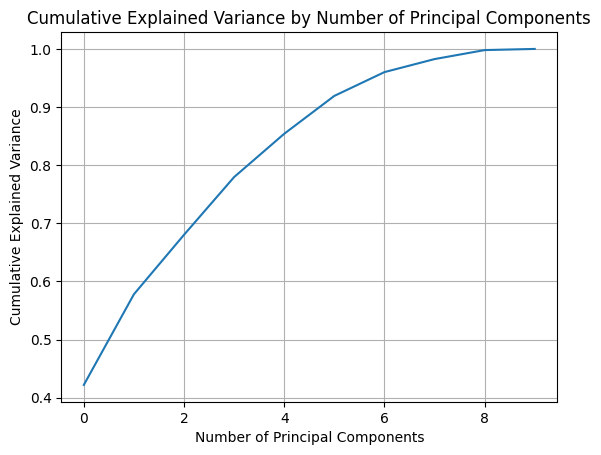

In [13]:
# Plotting the cumulative explained variance ratio to determine the number of components
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [14]:
# Reducing to 6 principal components based on the plot
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)  # Transforming the training data using PCA
X_test_pca = pca.transform(X_test_scaled)  # Transforming the test data using PCA

In [15]:
# K-Nearest Neighbors (KNN) classifier after applying PCA (with 6 components)
knn_classifier_pca = KNeighborsClassifier(n_neighbors=5)
knn_classifier_pca.fit(X_train_pca, y_train)

# Predicting on the test data after PCA
y_pred_pca = knn_classifier_pca.predict(X_test_pca)

# Calculating the accuracy with PCA
accuracy_with_pca = round(accuracy_score(y_test, y_pred_pca) * 100, 2)
print("Number of Features With PCA:", X_train_pca.shape[1])
print(f"Classification Accuracy With PCA: {accuracy_with_pca}%")

Number of Features With PCA: 6
Classification Accuracy With PCA: 80.67%
